##1. Cargue de imágenes

In [ ]:
#Liberías
import pandas as pd
import numpy as np
import pytesseract
from pytesseract import image_to_string
import os
from PIL import Image
import shutil
from google.colab import drive
from sklearn.metrics import confusion_matrix

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
#Importar imágenes de drive
drive.mount('/content/drive')

# Repositorio de las imágenes
carpeta1 = "/content/drive/MyDrive/Imagenes/Documentos"
carpeta2 = "/content/drive/MyDrive/Imagenes/Blanco"
repositorios = [carpeta1, carpeta2]

def filtrar_texto(repositorios, prefix="page-", start_index=1, end_index=302):
    for carpeta in repositorios:
        text_images_dir = os.path.join(carpeta, 'con_contenido')
        no_text_images_dir = os.path.join(carpeta, 'sin_contenido')

# Crear las carpetas
        os.makedirs(text_images_dir, exist_ok=True)
        os.makedirs(no_text_images_dir, exist_ok=True)

        for i in range(start_index, end_index + 2):
            image_name = f"{prefix}{i}.png"
            image_path = os.path.join(carpeta, image_name)
            try:
                img = Image.open(image_path)
                text = pytesseract.image_to_string(img).strip() # Extraer texto de la imagen
                if text:
                    shutil.move(image_path, os.path.join(text_images_dir, image_name)) # Si hay texto, mover la imagen a la carpeta 'con_contenido'
                    print(f"Imagen con texto encontrada: {image_name}")
                else:
                    shutil.move(image_path, os.path.join(no_text_images_dir, image_name)) # Si no hay texto, mover la imagen a la carpeta 'sin_contenido'
                    print(f"Imagen sin texto encontrada: {image_name}")
            except FileNotFoundError:
                print(f"Imagen no encontrada: {image_path}")
            except Exception as e:
                print(f"Error al procesar la imagen {image_name}: {str(e)}")

# Identificar texto de las imágenes y clasificarlas en carpetas
filtrar_texto(repositorios)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Imagen no encontrada: /content/drive/MyDrive/Imagenes/Documentos/page-1.png
Imagen con texto encontrada: page-2.png
Imagen con texto encontrada: page-3.png
Imagen con texto encontrada: page-4.png
Imagen no encontrada: /content/drive/MyDrive/Imagenes/Documentos/page-5.png
Imagen con texto encontrada: page-6.png
Imagen con texto encontrada: page-7.png
Imagen con texto encontrada: page-8.png
Imagen con texto encontrada: page-9.png
Imagen con texto encontrada: page-10.png
Imagen con texto encontrada: page-11.png
Imagen con texto encontrada: page-12.png
Imagen con texto encontrada: page-13.png
Imagen no encontrada: /content/drive/MyDrive/Imagenes/Documentos/page-14.png
Imagen con texto encontrada: page-15.png
Imagen con texto encontrada: page-16.png
Imagen no encontrada: /content/drive/MyDrive/Imagenes/Documentos/page-17.png
Imagen con texto encontrada: page-18.pn

##2. Matriz de confusión

In [ ]:
#Librerías
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

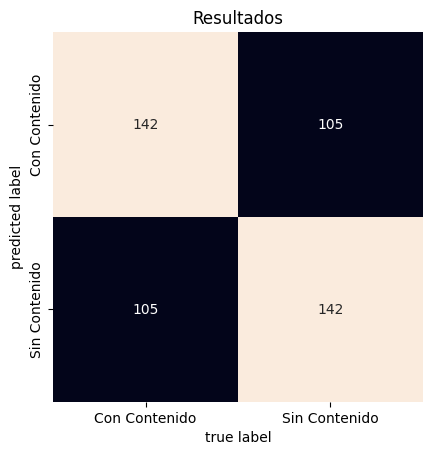

In [ ]:
#Repositorio
carpeta1_con_contenido = "/content/drive/MyDrive/Imagenes/Documentos/con_contenido"
carpeta1_sin_contenido = "/content/drive/MyDrive/Imagenes/Documentos/sin_contenido"
carpeta2_con_contenido = "/content/drive/MyDrive/Imagenes/Blanco/con_contenido"
carpeta2_sin_contenido = "/content/drive/MyDrive/Imagenes/Blanco/sin_contenido"

#Contar las imágenes en las carpetas
def count_images_in_folder(folder):
    return len([name for name in os.listdir(folder) if os.path.isfile(os.path.join(folder, name))])

true_positives = count_images_in_folder(carpeta1_con_contenido) + count_images_in_folder(carpeta2_con_contenido)
false_negatives = count_images_in_folder(carpeta1_sin_contenido) + count_images_in_folder(carpeta2_sin_contenido)
false_positives = count_images_in_folder(carpeta1_sin_contenido) + count_images_in_folder(carpeta2_sin_contenido)
true_negatives = count_images_in_folder(carpeta1_con_contenido) + count_images_in_folder(carpeta2_con_contenido)

# Crear la matriz de confusión
labels = ['Con Contenido', 'Sin Contenido']

confusion_matrix = [[true_positives, false_negatives], [false_positives, true_negatives]]

sns.heatmap(confusion_matrix, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=labels, yticklabels=labels)

plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Resultados')
plt.show()